<a href="https://colab.research.google.com/github/cakwok/CS6140-Machine-Learning/blob/main/2_3_Calculate_RME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CS6140 Assignment 1
Q2.3 Root Mean Square
Wing Man, Kwok
May 22 2022


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
def compute_cost(ip, op, params):
    """
    Cost function in linear regression where the cost is calculated
    ip: input variables
    op: output variables
    params: corresponding parameters
    Returns cost
    """
    num_samples = len(ip)
    cost_sum = 0.0
    for x,y in zip(ip, op):
        y_hat = np.dot(params, np.array([1.0, x]))
        cost_sum += (y_hat - y) ** 2
    
    cost = cost_sum / (num_samples)
    
    return cost

In [38]:
def linear_regression_using_batch_gradient_descent(ip, op, params, alpha, max_iter):
    """
    Compute the params for linear regression using batch gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    max_iter: maximum number of iterations
    Returns parameters, cost, params_store
    """ 
    # initialize iteration, number of samples, cost and parameter array
    iteration = 0
    num_samples = len(ip)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    
    # Compute the cost and store the params for the corresponding cost
    while iteration < max_iter:
        cost[iteration] = compute_cost(ip, op, params)
        params_store[:, iteration] = params
        
        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        ip_with_bias = np.c_[ np.ones(80), ip]       #convert x variables with bias column all 1
          
        #All calculation at a time, so it is batch. it won't arrive at faster computation nor accuracy, but computer resources require more because all data points are processed at a time 
        y_hat = np.dot(ip_with_bias, params)  
        gradient = np.dot(ip_with_bias.transpose(), (op - y_hat))
        params += alpha/num_samples * gradient
        
        iteration += 1

    return params, cost, params_store

In [46]:
def lin_reg_stoch_gradient_descent(ip, op, params, alpha):
    """
    Compute the params for linear regression using stochastic gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    Returns parameters, cost, params_store
    """

    # initialize iteration, number of samples, cost and parameter array
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    i = 0
    
    # Compute the cost and store the params for the corresponding cost
    for x,y in zip(input_var, output_var):
        cost[i] = compute_cost(input_var, output_var, params)
        params_store[:, i] = params
        
        print('--------------------------')
        print(f'iteration: {i}')
        print(f'cost: {cost[i]}')
        
        # Apply stochastic gradient descent (one calculation at a time, so it is stochastic)
        y_hat = np.dot(params, np.array([1.0, x]))  #np.array instead of purley ip[i], is because the whole ip[i] features have to be considered
        params += alpha/num_samples * (y - y_hat) * np.array([1.0, x]) 
       
          
        i += 1
    
    return params, cost, params_store

In [47]:
# Do not change the code in this cell
true_slope = 15
true_intercept = 2.4
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 300.0 * np.random.rand(len(input_var))

In [ ]:
# Do not change the code in this cell
# Training the model
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

params_0 = np.array([20.0, 80.0])

alpha_batch = 1e-3
max_iter = 100
params_hat_batch, cost_batch, params_store_batch =\
    linear_regression_using_batch_gradient_descent(x_train, y_train, params_0, alpha_batch, max_iter)

print("cost_batch", cost_batch)

In [49]:
# Do not change the code in this cell
alpha = 1e-3
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store =\
lin_reg_stoch_gradient_descent(x_train, y_train, params_0, alpha)

--------------------------
iteration: 0
cost: 12977447.672945132
--------------------------
iteration: 1
cost: 12977450.868193822
--------------------------
iteration: 2
cost: 12977637.765682368
--------------------------
iteration: 3
cost: 12977146.511749584
--------------------------
iteration: 4
cost: 12977492.116379358
--------------------------
iteration: 5
cost: 12976278.023003688
--------------------------
iteration: 6
cost: 12971934.716870187
--------------------------
iteration: 7
cost: 12967571.52030999
--------------------------
iteration: 8
cost: 12955568.063147712
--------------------------
iteration: 9
cost: 12945761.040908705
--------------------------
iteration: 10
cost: 12928754.545349726
--------------------------
iteration: 11
cost: 12907845.897804067
--------------------------
iteration: 12
cost: 12875821.500944637
--------------------------
iteration: 13
cost: 12843330.955212072
--------------------------
iteration: 14
cost: 12812231.174761383
---------------------

In [13]:
print("params_hat_batch", params_hat_batch)
rms_BatchGradientDescent = np.sqrt(np.mean(np.square(params_hat_batch[0] + params_hat_batch[1]*x_test - y_test)))
rms_SGD = np.sqrt(np.mean(np.square(params_hat[0] + params_hat[1]*x_test - y_test)))
print(f'batch rms:      {rms_BatchGradientDescent}')
print(f'stochastic rms: {rms_SGD}')

params_hat_batch [22.17721025 16.79345048]
batch rms:      125.13283253592064
stochastic rms: 153.6058186850665


cost_batch [1.37222157e+07 1.95683092e+04 1.09947521e+04 1.10303897e+04
 1.10294379e+04 1.10272877e+04 1.10251058e+04 1.10229240e+04
 1.10207433e+04 1.10185637e+04 1.10163852e+04 1.10142078e+04
 1.10120315e+04 1.10098563e+04 1.10076822e+04 1.10055091e+04
 1.10033372e+04 1.10011663e+04 1.09989965e+04 1.09968278e+04
 1.09946602e+04 1.09924937e+04 1.09903283e+04 1.09881640e+04
 1.09860007e+04 1.09838385e+04 1.09816775e+04 1.09795174e+04
 1.09773585e+04 1.09752007e+04 1.09730439e+04 1.09708883e+04
 1.09687337e+04 1.09665802e+04 1.09644277e+04 1.09622764e+04
 1.09601261e+04 1.09579769e+04 1.09558288e+04 1.09536817e+04
 1.09515358e+04 1.09493909e+04 1.09472471e+04 1.09451043e+04
 1.09429626e+04 1.09408221e+04 1.09386825e+04 1.09365441e+04
 1.09344067e+04 1.09322704e+04 1.09301352e+04 1.09280010e+04
 1.09258679e+04 1.09237359e+04 1.09216050e+04 1.09194751e+04
 1.09173463e+04 1.09152185e+04 1.09130918e+04 1.09109662e+04
 1.09088417e+04 1.09067182e+04 1.09045958e+04 1.09024744e+04
 1.09003541e+

NameError: ignored

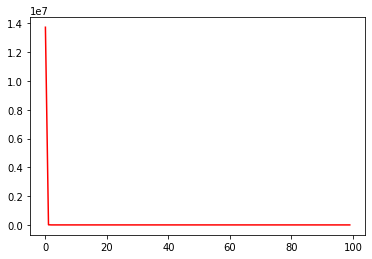

In [52]:
# Do not change the code in this cell
plt.figure()
plt.plot(np.arange(max_iter), cost_batch, 'r', label='batch')
print("cost_batch", cost_batch)
plt.plot(np.arange(len(cost)), cost, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized cost')
plt.legend()
plt.show()
print(f'min cost with BGD: {np.min(cost_batch)}')
print(f'min cost with SGD: {np.min(cost)}')